In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np

In [2]:
bank=pd.read_csv("E:/SHRADDHA/DA-DS Assignments/DS Assignments/6.A_Logistic Regression/bank.csv",sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
columns=['age','balance','duration','campaign','y']
bank1=bank[columns]
bank1

,age,balance,duration,campaign,y
0,58,2143,261,1,no
1,44,29,151,1,no
2,33,2,76,1,no
3,47,1506,92,1,no
4,33,1,198,1,no
...,...,...,...,...,...
45206,51,825,977,3,yes
45207,71,1729,456,2,yes
45208,72,5715,1127,5,yes
45209,57,668,508,4,no


In [4]:
bank1.describe()

,age,balance,duration,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841
std,10.618762,3044.765829,257.527812,3.098021
min,18.000000,-8019.000000,0.000000,1.000000
25%,33.000000,72.000000,103.000000,1.000000
50%,39.000000,448.000000,180.000000,2.000000
75%,48.000000,1428.000000,319.000000,3.000000
max,95.000000,102127.000000,4918.000000,63.000000


In [5]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


In [16]:
bank1['y'] = np.where(bank1['y'].str.contains("yes"), 1, 0)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_1880/2066328610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank1['y'] = np.where(bank1['y'].str.contains("yes"), 1, 0)


In [17]:
X=bank1.iloc[:,0:4]
Y=bank1.iloc[:,4]

In [18]:
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [19]:
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [21]:
((39344+850)/(39344+578+4439+850))*100

88.90314304041051

In [22]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.60      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [24]:
fpr,tpr,thresholds=roc_curve(Y,y_pred)
auc=roc_auc_score(Y,y_pred)

Text(0, 0.5, 'True Positive Rate')

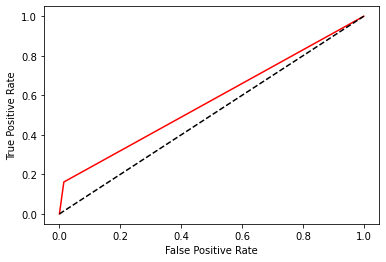

In [25]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model(area%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [26]:
auc

0.5734694329116669